paper: Measurements on release-recapture of cold 85Rb atoms  using an optical nanofibre in a magneto-optical trap

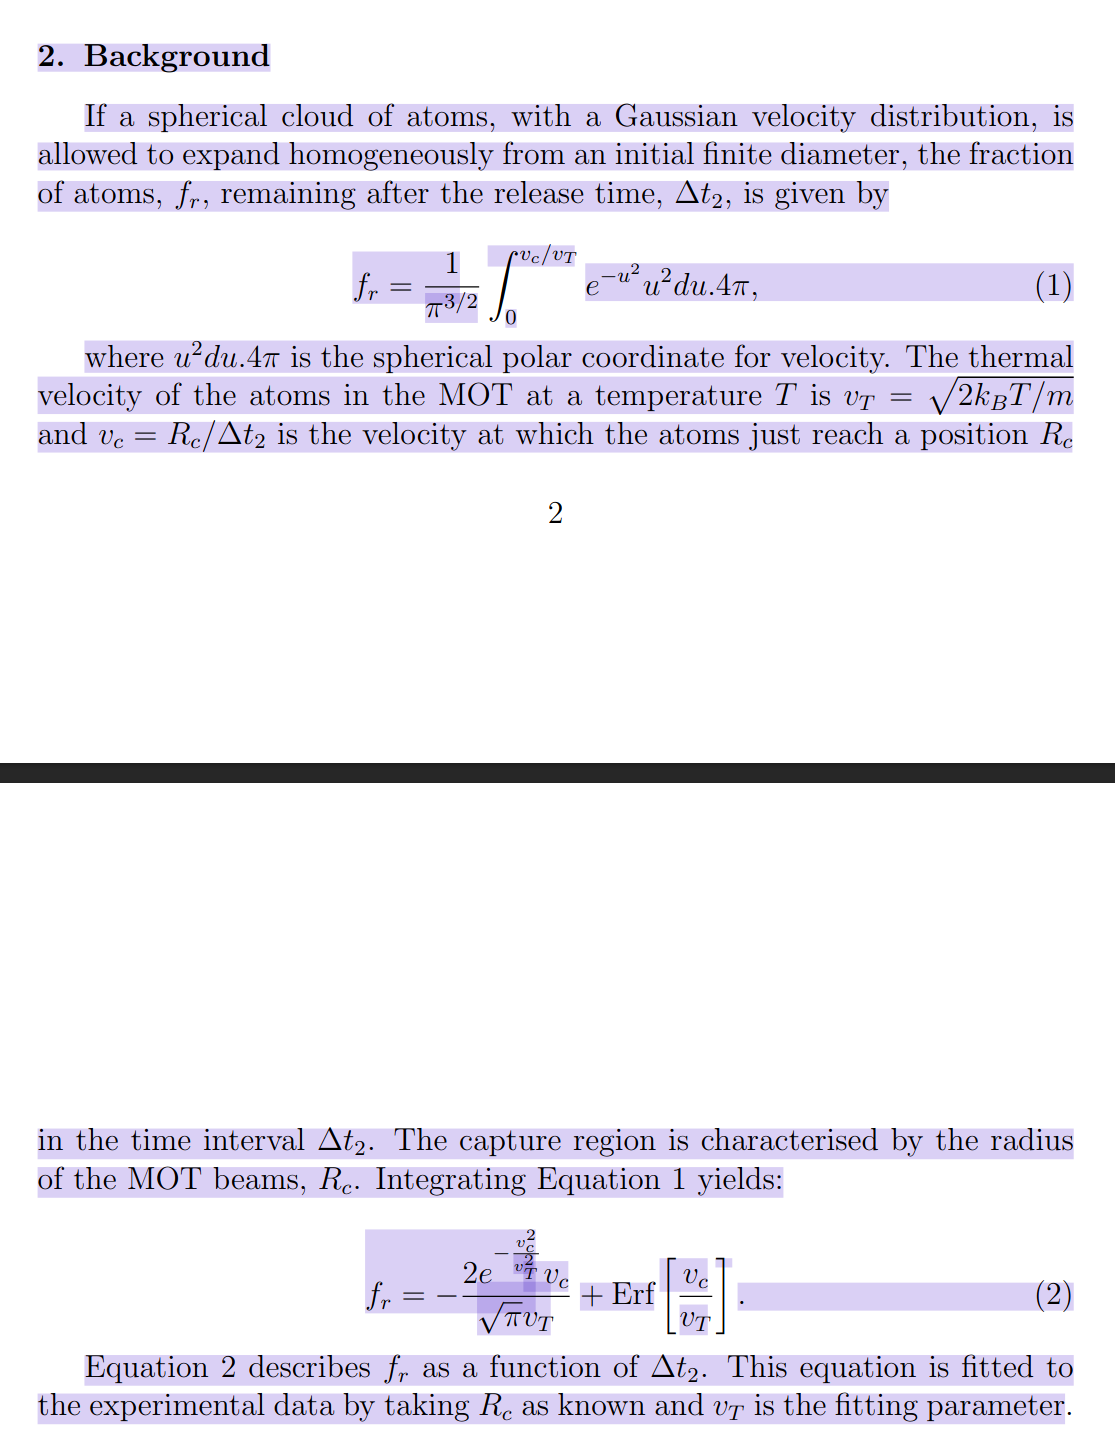

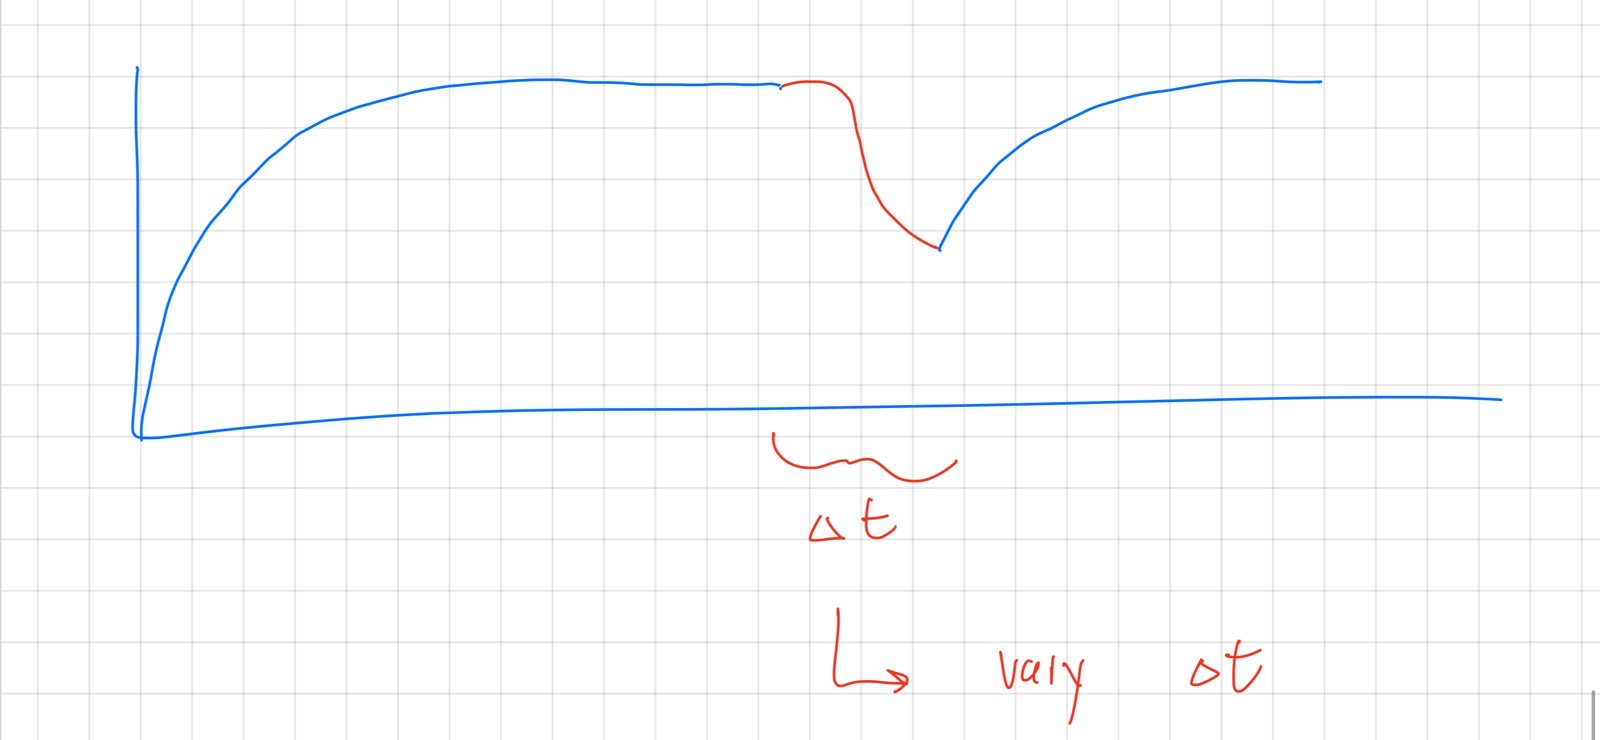

In [18]:
import numpy as np
from scipy.special import erf
from scipy.optimize import root_scalar
from scipy.special import erf
import scipy.constants as const
import plot_functions as p_func


In [19]:
c_scheme = p_func.c_scheme_02()

In [83]:
def fraction_of_atoms(t, Rc, T, m):

    vc = Rc / t
    vt = np.sqrt(2 * const.k * T / m)

    term1 = - (2 * np.exp(- vc**2 / vt**2) * vc) / (np.sqrt(np.pi) * vt)
    term2 =  erf(vc / vt)

    fr = term1 + term2

    return fr



Rc = 0.4e-2  # radius in meters
T = 1e-4     # temperature in Kelvin (1 µK)
m = 85.47 * const.atomic_mass  # rubidium-85 in kg
initial_guess = [Rc, T, m]
t = np.linspace(1e-4, 0.07, 1000)  # avoid t = 0
fr = fraction_of_atoms(t, *initial_guess)



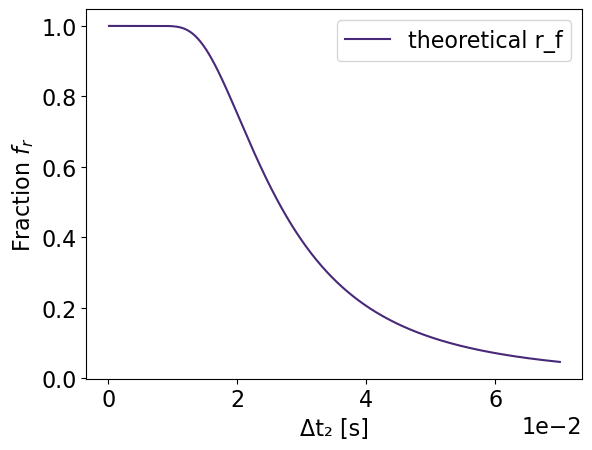

In [84]:

data_to_range = [
    [t, fr, "theoretical r_f", c_scheme[1], "-", ""],
]

p_func.plot_with_one_axis(data_to_range, name_x="Δt₂ [s]", name_y="Fraction $f_r$", plot_title='', filename_to_save='nosvg', marker_size='5', font_size=16, offset_text_size=16, legend_local='best', legend_size=16, x_ticks_limit=5, x_ticks_numstyle='sci', line_width=1.5, y_lim=None)